In [1]:
# Import libraries that we'll need...
import pandas as pd
import numpy as np
from sklearn.utils import resample
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib

In [2]:
# Import data (I uploaded a copy to blackboard) and see what's in it
df_gfr = pd.read_csv('gfr.csv')
df_gfr.head()

,gfr
0,108
1,91
2,62
3,59
4,84


In [3]:
# Mean and standard error of the mean
(df_gfr['gfr'].mean().round(3), df_gfr['gfr'].sem().round(3))

(54.265, 0.945)

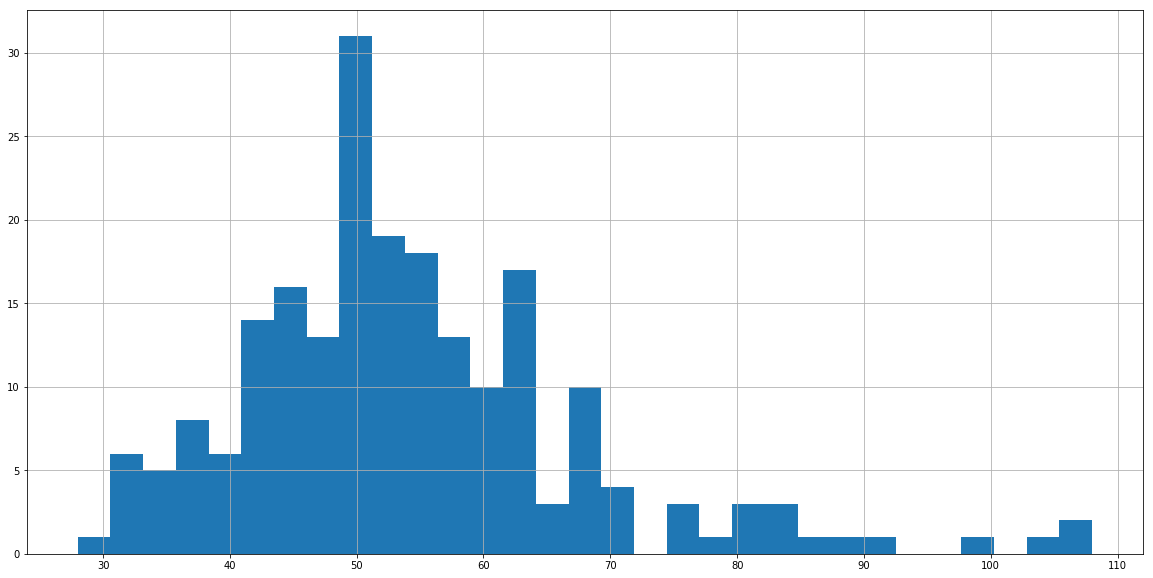

In [4]:
df_gfr['gfr'].hist(bins=31, figsize=(20,10))

In [5]:
# Perform bootstrap ressampling and collect results.
N = df_gfr.shape[0]
B = 1000

x_bars = list()
x_bars_win = list()
medians = list()


for bootstrap_it in range(1, B+1):
    x_bars.append(np.mean(resample(df_gfr['gfr'], n_samples=N)))
    x_bars_win.append(np.mean(winsorize(resample(df_gfr['gfr'], n_samples=N), [0.25, 0.25])))
    medians.append(np.quantile(resample(df_gfr['gfr'], n_samples=N),0.5))
    
    
x_bars_m, x_bars_se = np.mean(x_bars), np.std(x_bars)
x_bars_win_m, x_bars_win_se = np.mean(x_bars_win), np.std(x_bars_win)
medians_m, medians_se = np.mean(medians), np.std(medians)

In [6]:
(x_bars_m, x_bars_se)

(54.19834123222749, 0.9766533387649645)

In [7]:
(x_bars_win_m, x_bars_win_se)

(52.92563981042654, 0.8681905637659519)

In [8]:
(medians_m, medians_se)

(52.212, 0.8983629556031347)